# Precision Recall

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

/Users/Amiros/opt/anaconda3/envs/pratt_ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
data.data.shape

(569, 30)

In [8]:
from sklearn.metrics import confusion_matrix

# print(confusion_matrix(y_test, y_pred))
print(lr.score(X_test, y_test))

0.9370629370629371


In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



# Precision Recall Curve

In [9]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

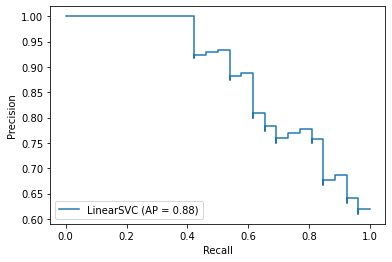

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)

# ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


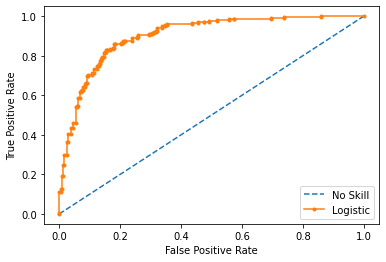

In [11]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Imbalanced data

In [12]:
from sklearn.datasets import fetch_openml
# mammography dataset https://www.openml.org/d/310
data = fetch_openml('mammography')
X, y = data.data, data.target
y = (y.astype(np.int) + 1) // 2

In [13]:
np.bincount(y)

array([10923,   260])

In [14]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)


lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[2729    4]
 [  36   27]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2733
           1       0.87      0.43      0.57        63

    accuracy                           0.99      2796
   macro avg       0.93      0.71      0.78      2796
weighted avg       0.98      0.99      0.98      2796



In [16]:
lr = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[2418  315]
 [   6   57]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2733
           1       0.15      0.90      0.26        63

    accuracy                           0.89      2796
   macro avg       0.58      0.89      0.60      2796
weighted avg       0.98      0.89      0.92      2796



In [ ]:
#!pip install --user imblearn

In [18]:
X_train.shape

(8387, 6)

In [19]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_sample(X_train, y_train)

print(X_train.shape)
print(X_train_subsample.shape)
print(np.bincount(y_train_subsample))


(8387, 6)
(394, 6)
[197 197]


In [20]:
lr = LogisticRegression().fit(X_train_subsample, y_train_subsample)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2733
           1       0.15      0.90      0.26        63

    accuracy                           0.88      2796
   macro avg       0.57      0.89      0.60      2796
weighted avg       0.98      0.88      0.92      2796



In [21]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler

oversample_pipe = make_imb_pipeline(RandomOverSampler(),
                                    LogisticRegression())

oversample_pipe.fit(X_train, y_train)
y_pred = oversample_pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2733
           1       0.16      0.90      0.27        63

    accuracy                           0.89      2796
   macro avg       0.58      0.90      0.60      2796
weighted avg       0.98      0.89      0.92      2796



In [25]:
X_train_oversample, y_train_oversample = RandomOverSampler().fit_sample(X_train, y_train)


print(X_train.shape)
print(X_train_oversample.shape)
print(np.bincount(y_train_oversample))

(8387, 6)
(16380, 6)
[8190 8190]


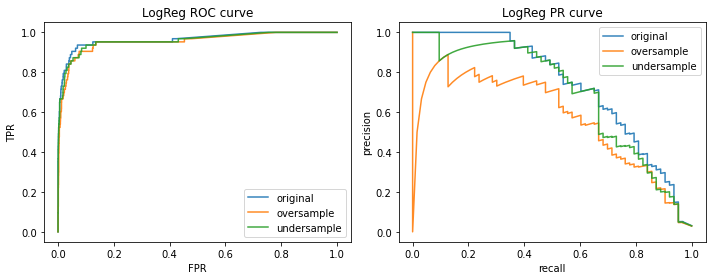

In [26]:
from sklearn.metrics import roc_curve, precision_recall_curve

probs_oversample = oversample_pipe.predict_proba(X_test)[:, 1]
fpr_over, tpr_over, _ = roc_curve(y_test, probs_oversample)
precision_over, recall_over, _ = precision_recall_curve(y_test, probs_oversample)

undersample_pipe = make_imb_pipeline(RandomUnderSampler(),
                                    LogisticRegression())
undersample_pipe.fit(X_train, y_train)
probs_undersample = undersample_pipe.predict_proba(X_test)[:, 1]
fpr_under, tpr_under, _ = roc_curve(y_test, probs_undersample)
precision_under, recall_under, _ = precision_recall_curve(y_test, probs_undersample)

lr = LogisticRegression().fit(X_train, y_train)
probs_original = lr.predict_proba(X_test)[:, 1]
fpr_org, tpr_org, _ = roc_curve(y_test, probs_original)
precision_org, recall_org, _ = precision_recall_curve(y_test, probs_original)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(fpr_org, tpr_org, label="original", alpha=.9)
axes[0].plot(fpr_over, tpr_over, label="oversample", alpha=.9)
axes[0].plot(fpr_under, tpr_under, label="undersample", alpha=.9)
axes[0].legend()
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TPR")
axes[0].set_title("LogReg ROC curve")

axes[1].plot(recall_org, precision_org, label="original", alpha=.9)
axes[1].plot(recall_over, precision_over, label="oversample", alpha=.9)
axes[1].plot(recall_under, precision_under, label="undersample", alpha=.9)
axes[1].legend()
axes[1].set_xlabel("recall")
axes[1].set_ylabel("precision")
axes[1].set_title("LogReg PR curve")
plt.tight_layout()

# Hyper-Parameter Tuning

Hyper-parameters are parameters that are not directly learnt within estimators. 

In [27]:
# find the names and current values for all paramters for a given estimator
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

A search consists of:

* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme; and
* a score function.

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
X.shape

In [ ]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=100, tol=0.1)
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('logistic', logistic)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'logistic__C': np.logspace(-4, 4, 4),
    'logistic__penalty':['l2', 'l1'],
    'logistic__class_weight':['balanced', 'none']
    
}
search = GridSearchCV(pipe, param_grid,
                      scoring='f1_micro',
                      n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

In [ ]:
y_pred = search.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
search.best_estimator_

In [ ]:
new_lr = LogisticRegression(C=10000.0, class_weight='none', tol=0.1)
new_lr.fit(X_train, y_train)

y_pred = new_lr.predict(X_test)

print(classification_report(y_test, y_pred))

# Feature Selection

# Explainability

In [ ]:
#!pip install --user shap
# !pip install --user numba

In [ ]:
import pandas as pd

plt.figure(figsize=(10, 4))
df = pd.DataFrame(new_lr.coef_)
ax = plt.gca()
df.plot.bar(ax=ax, width=.9)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-.5, len(df) - .5)
ax.set_xlabel("feature index")
ax.set_ylabel("importance value")
plt.vlines(np.arange(.5, len(df) -1), -1.5, 1.5, linewidth=.5)

In [ ]:
import shap

explainer = shap.LinearExplainer(new_lr, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)


## Summarize the effect of all the features


Shapley values calculate the importance of a feature by comparing what a model predicts with and without the feature. However, since the order in which a model sees features can affect its predictions, this is done in every possible order, so that the features are fairly compared.

* The y-axis indicates the variable name, in order of importance from top to bottom. The value next to them is the mean SHAP value.
* On the x-axis is the SHAP value. Indicates how much is the change in log-odds. From this number we can extract the probability of success.
* Gradient color indicates the original value for that variable. In booleans, it will take two colors, but in number it can contain the whole spectrum.
* Each point represents a row from the original dataset.

In [ ]:
shap.summary_plot(shap_values, X_test)


In [ ]:
# try this with randomforests